In [ ]:
import tensorflow as tf

### 1. Create regression dataset, build and fit a model to it. ###

In [ ]:
# Creating data points
X = tf.cast(tf.range(0, 21), dtype=tf.float32)

y = 2*X - 5

# reshaping X:
X = tf.expand_dims(X, axis = -1)
print(X.shape)

(21, 1)


In [ ]:
# Building and fitting a first model

model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

model_0.compile(
    optimizer = tf.keras.optimizers.SGD(),
    loss = tf.keras.losses.MeanAbsoluteError(),
    metrics = ['mae']
)

model_0.fit(X, y, epochs = 500, verbose = False)

In [ ]:
model_0.summary()

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_20 (Dense)            (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


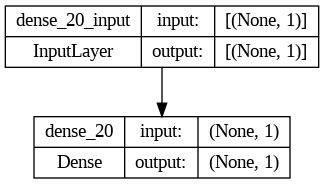

In [ ]:
# Summary of model's layers
from tensorflow.keras.utils import plot_model

plot_model(model_0, show_shapes = True)

In [ ]:
# Calculated weight and bias
weight, bias = model_0.layers[0].get_weights()

print(weight, bias)

[[1.8001926]] [-2.0838044]


### 2. Building a neural network with 4 Dense layers and fitting it to regression dataset ###

In [ ]:
# Create a model with 4 layers

model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(4),
    tf.keras.layers.Dense(1)

])

model_1.compile(
    loss = tf.keras.losses.MeanAbsoluteError(),
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    metrics = ['mae']
)

model_1.fit(X, y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 1s 621ms/step - loss: 32.0561 - mae: 32.0561
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 29.5072 - mae: 29.5072
Epoch 3/100
1/1 [==============================] - 0s 8ms/step - loss: 27.0643 - mae: 27.0643
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 24.7209 - mae: 24.7209
Epoch 5/100
1/1 [==============================] - 0s 9ms/step - loss: 22.4806 - mae: 22.4806
Epoch 6/100
1/1 [==============================] - 0s 10ms/step - loss: 20.3837 - mae: 20.3837
Epoch 7/100
1/1 [==============================] - 0s 8ms/step - loss: 18.3785 - mae: 18.3785
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 16.4596 - mae: 16.4596
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 14.6272 - mae: 14.6272
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 12.9203 - mae: 12.9203
Epoch 11/100
1/1 [==============================] - 0s 7

In [ ]:
model_1.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 4)                 8         
                                                                 
 dense_22 (Dense)            (None, 4)                 20        
                                                                 
 dense_23 (Dense)            (None, 4)                 20        
                                                                 
 dense_24 (Dense)            (None, 1)                 5         
                                                                 
Total params: 53
Trainable params: 53
Non-trainable params: 0
_________________________________________________________________


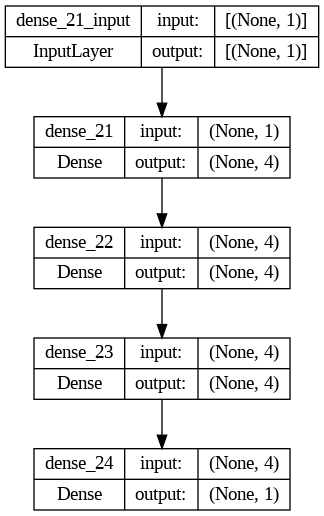

In [ ]:
plot_model(model_1, show_shapes = True)

In [ ]:
weight, bias = model_1.layers[3].get_weights()
print(weight, bias)

[[ 0.4385777 ]
 [-0.8164318 ]
 [-0.86801976]
 [-0.7417164 ]] [-0.32443497]


### 3. Import the Boston pricing dataset from TensorFlow `tf.keras.datasets` and model it.###

In [ ]:
# Loading the data

(X_train, y_train), (X_test, y_test) = tf.keras.datasets.boston_housing.load_data(path='boston_housing.npz', test_split=0.2)

57026/57026 [==============================] - 0s 0us/step


In [ ]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [ ]:
# Building a model

model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])

model_2.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate = 0.01),
    loss = tf.keras.losses.mse,
    metrics = ['mse']
)

history = model_2.fit(X_train_scaled, y_train, epochs = 200, verbose = False)

In [ ]:
# Evaluating a model
model_2.evaluate(X_test_scaled, y_test)

4/4 [==============================] - 0s 2ms/step - loss: 55.3694 - mse: 55.3694


[55.36941909790039, 55.36941909790039]

<Axes: >

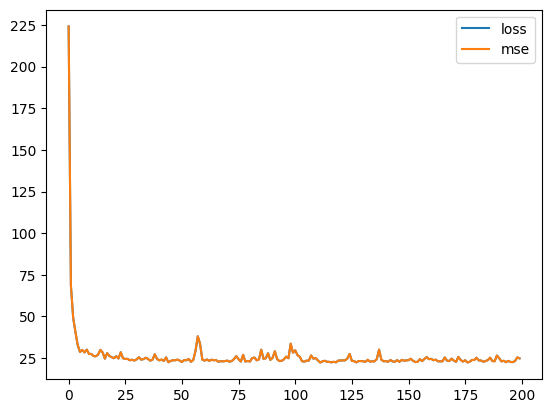

In [ ]:
# Plot loss curve

import pandas as pd

pd.DataFrame(history.history).plot()